## Introduction

#### Background
Studies have shown that snowpack and snowmelt patterns are changing and that bud burst, also known as green-up, timing is changing as well, both due to climate change. (Choi, 2010 Richardson, 2013). The time period between snow disappearance and budburst—known as the vernal window (Grogan 2020)—is critical for hydrological processes that impact forest ecosystem health well into the growing season.(Grogan, Richardson). Thus, identifying markers of the vernal window is essential for defining hydrological and ecological dynamics in snow-affected ecosystems, especially in light of earlier snowmelt and earlier budburst due to climate change. (Richardson). 

#### Aims 
##### Aim 1: 
Quantify winter severity and analyze whether/how winter severity may be changing over time, in order to understand how snowpack patterns may be changing. 
##### Aim 2:
Identify dates of transition from winter to spring  at both locations for each late winter/spring season. Compare the yearly timing of annual average of peak snow depth, peak soil moisture and peak spring discharge at and between both locations. This helps identify various chronoligical markers within the vernal window time period. 
##### Aim 3: 
Identify lags (length of time) between several dates of transition throughout the vernal window.  
##### Aim 4: 
Use correlational analysis to determine whether timing of transitions and duration of lags varied as a function of winter severity. 

#### Site Description
This study focused on two New Hampshire locations: the area surrounding USGS gauge 01073500, Lamprey River, Newmarket, and the area surrounding USGS gauge 01074520, Pemigewasset River, Woodstock. The two locations were chosen for differences in winter severity. Woodstock is about 100 km north of Newmarket and is no less than 120 kilometers from the coastline with an elevation of 226 m, while Newmarket is located about 12 kilometers from the coast with an elevation of 12 m. These differences in coastal proximity, elevation and latitudinal difference result in more mild winter weather in Newmarket: Newmarket’s average annual minimum temperature range is -23.3 to -20.6 °C, while Woodstock’s is -28.9 to -26.1 °C.1 These differences in climate are meant to be representative of differences between the White Mountains and Southeastern New Hampshire, and the results of this study may be reflective of how the two regions experience climate change differently. 
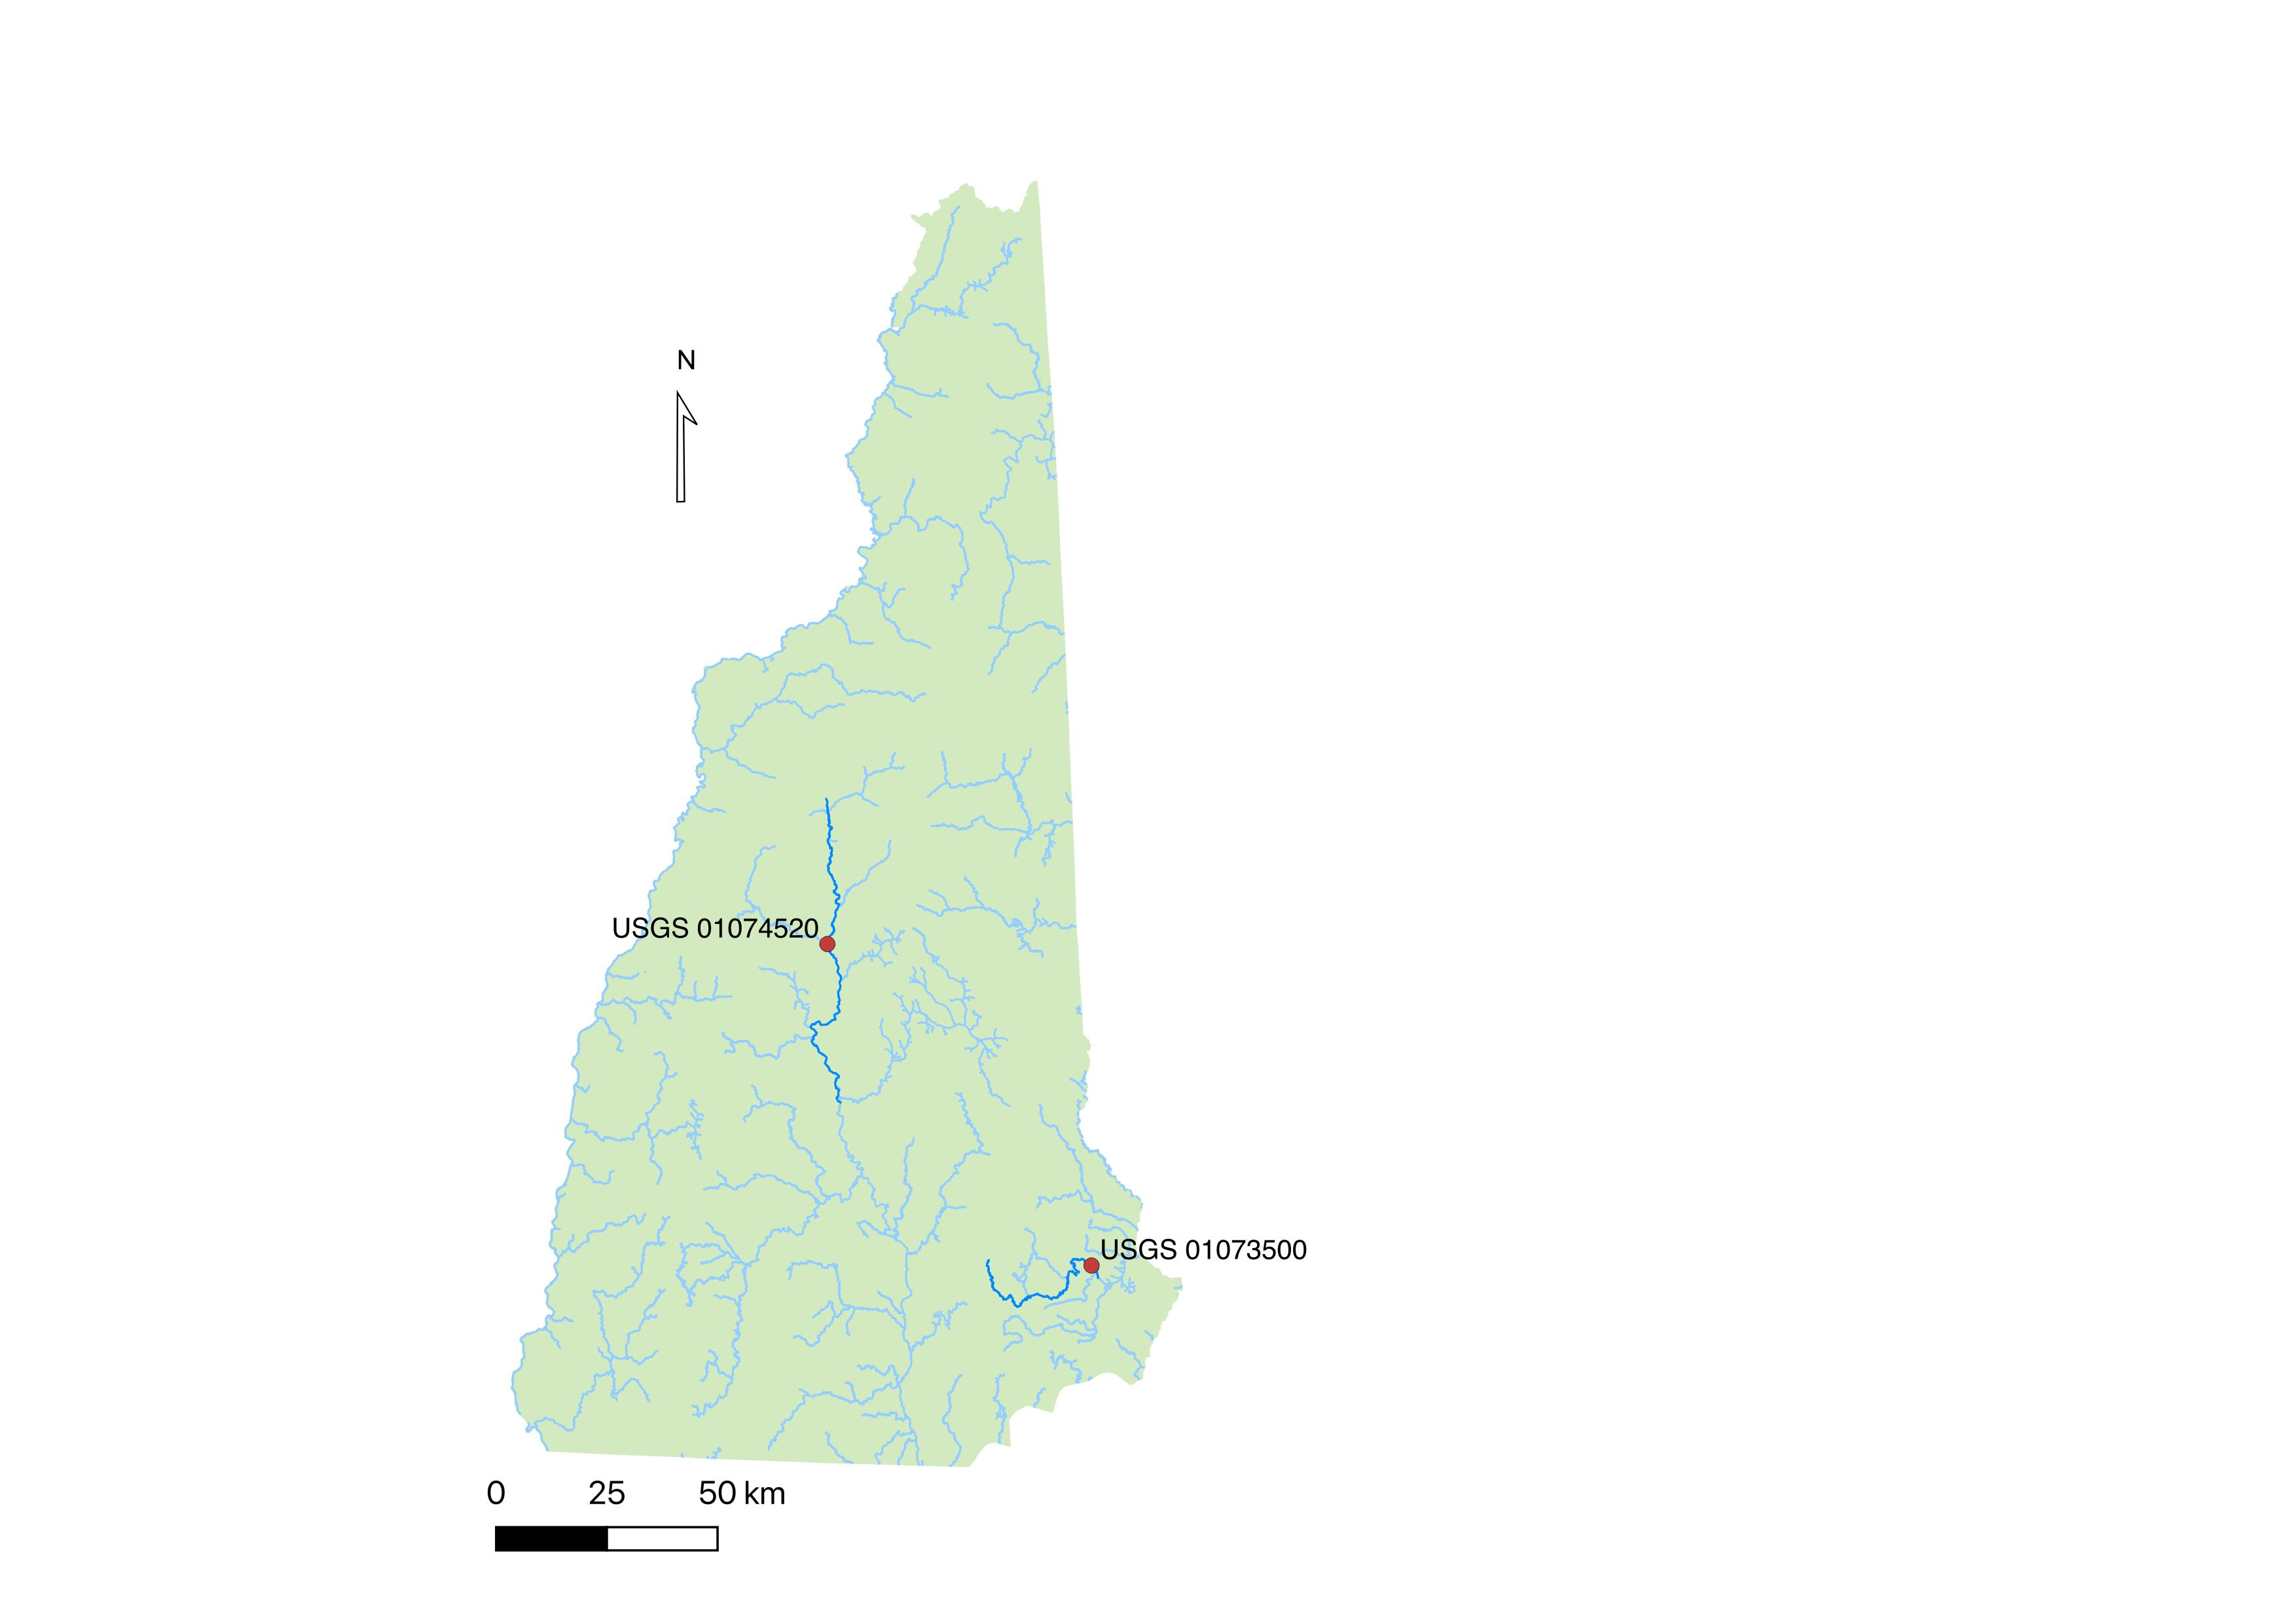

#### Data
This study used .csv files from LOCA-WBM (localized constructed analogs-water balance model) daily climate and drought data found using CMIP5 (Coupled Model Intercomparison Project Phase 5) simulations for both RCP 4.5 and 8.5 scenarios, for each site for the following: precipitation, snowfall, snowpack (SWE), and soil moisture. My advisor, Liz Burakowski, ran these simulations. There are 29 different models for each variable at each site; this study chose to focus analysis on data from one model that predicted comparatively high precipitation, one that predicted comparatively moderate precipitation, and one that predicted comparatively low precipitation. Historical data from this simulation runs from 1980-1-1 through 2005-12-31; future simulated data is available from 2006-1-1 to 2099-12-31.

##### Data import, loading, and handling
Necessary libraries were imported. 

CMAP data (temperature, soil moisture, snowpack and discharge) for each location were imported, keeping only the models that Bond (YEAR) used (ACCESS1-3, HADGEM2-ES, NorESM1-M, inmcm4, MIROC_ESM), selected for representing a variety of temperature and precipitation scenarios based on the following chart, from Bond (20??). 

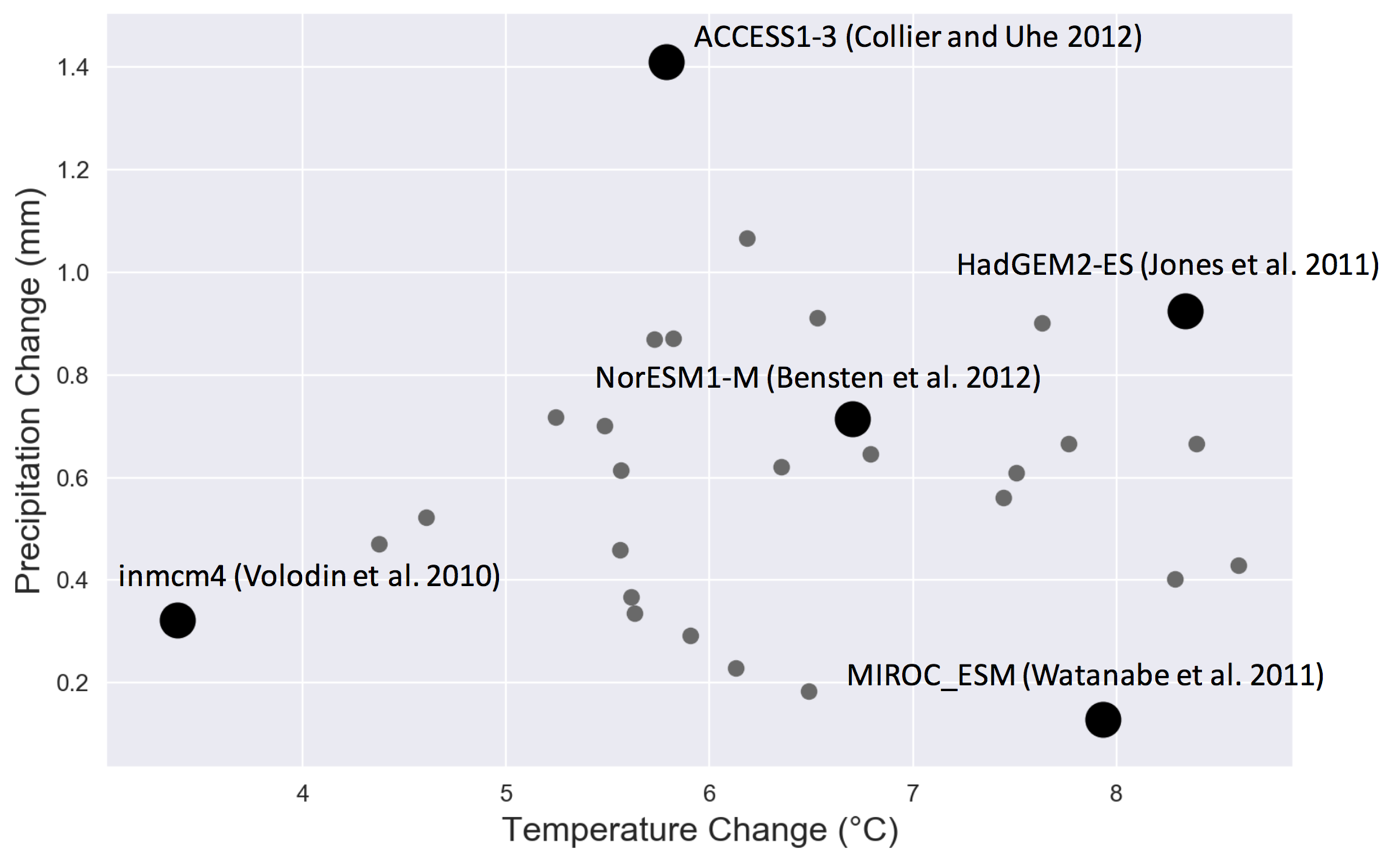

The LOCA-WBM daily climate and drought data found using CMIP5 simulations contained missing values or values that needed to be replaced for the years 2005 and 2006, when the model transitioned from a historical simulaion to a future simulation. 2005 and 2006 were later disregarded.   

Constants for freezing temperature and no snow depth were set, based on Grogan (2020). 


In [1]:
#%%Import libraries
import pandas as pd
from datetime import datetime
from pprint import pprint
import numpy as np                   
from matplotlib import pyplot as plt 

In [2]:
#%%Import files
fileTL =  'LampreyRiver_tasmax_rcp45_1980-2099_daily.csv'   # Lamprey temp file
fileTP = 'PemigewassetRiver_tasmax_rcp45_1980-2099_daily.csv' #Pemi temp file
fileSPL = 'LampreyRiver_snowPack_rcp45_1980-2099_daily.csv' #lamprey snowpack file
fileSPP = 'PemigewassetRiver_snowPack_rcp45_1980-2099_daily.csv' #pemi snowpack file
fileSMLacc = 'LampreyRiver_soilMoist_ACCESS1-3_rcp45_1980-2099_timeseries.csv' #lamprey soil moisture/ACCESS1-3
fileSMLhad = 'LampreyRiver_soilMoist_HadGEM2-ES_rcp45_1980-2099_timeseries.csv' #lamprey soil moisture/HADGEM2-ES
fileSMLnor =  'LampreyRiver_soilMoist_NorESM1-M_rcp45_1980-2099_timeseries.csv' #lamprey soil moisture/NorESM1-M
fileSMLinm = 'LampreyRiver_soilMoist_inmcm4_rcp45_1980-2099_timeseries.csv' #lamprey soil moisture/inmcm4
fileSMLmir = 'LampreyRiver_soilMoist_MIROC-ESM_rcp45_1980-2099_timeseries.csv' #lamprey soil moisture/MIROC_ESM
fileQLacc = 'LampreyRiver_discharge_ACCESS1-3_rcp45_1980-2099_timeseries.csv' #lamprey discharge/ACCESS1-3
fileQLhad = 'LampreyRiver_discharge_HadGEM2-ES_rcp45_1980-2099_timeseries.csv' #lamprey discharge/HADGEM2-ES
fileQLnor = 'LampreyRiver_discharge_NorESM1-M_rcp45_1980-2099_timeseries.csv' #lamprey discharge/NorESM1-M
fileQLinm = 'LampreyRiver_discharge_inmcm4_rcp45_1980-2099_timeseries.csv' #lamprey discharge/inmcm4
fileQLmir = 'LampreyRiver_discharge_MIROC-ESM_rcp45_1980-2099_timeseries.csv' #lamprey discharge/MIROC_ESM
fileSMPacc = 'PemigewassetRiver_soilMoist_ACCESS1-3_rcp45_1980-2099_timeseries.csv' #pemi soil moisture/ACCESS1-3
fileSMPhad = 'PemigewassetRiver_soilMoist_HadGEM2-ES_rcp45_1980-2099_timeseries.csv' #pemi soil moisture/HADGEM2-ES
fileSMPnor = 'PemigewassetRiver_soilMoist_NorESM1-M_rcp45_1980-2099_timeseries.csv'  #pemi soil moisture/NorESM1-M
fileSMPinm = 'PemigewassetRiver_soilMoist_inmcm4_rcp45_1980-2099_timeseries.csv' #pemi soil moisture/inmcm4
fileSMPmir = 'PemigewassetRiver_soilMoist_MIROC-ESM_rcp45_1980-2099_timeseries.csv' #pemi soil moisture/MIROC_ESM
fileQPacc = 'PemigewassetRiver_discharge_ACCESS1-3_rcp45_1980-2099_timeseries.csv' #pemi discharge/ACCESS1-3
fileQPhad = 'PemigewassetRiver_discharge_HadGEM2-ES_rcp45_1980-2099_timeseries.csv' #pemi discharge/HADGEM2-ES
fileQPnor = 'PemigewassetRiver_discharge_NorESM1-M_rcp45_1980-2099_timeseries.csv' #pemi discharge/NorESM1-M
fileQPinm = 'PemigewassetRiver_discharge_inmcm4_rcp45_1980-2099_timeseries.csv' #pemi discharge/inmcm4
fileQPmir = 'PemigewassetRiver_discharge_MIROC-ESM_rcp45_1980-2099_timeseries.csv' #pemi discharge/MIROC_ESM

In [ ]:
#Lamprey temp
dftl = pd.read_csv(fileTL, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dftl = dftl[['ACCESS1-3', 'HadGEM2-ES', 'NorESM1-M', 'inmcm4', 'MIROC-ESM']]
dftl.index = pd.to_datetime(dftl.index)
#Pemi temp
dftp = pd.read_csv(fileTP, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dftp = dftp[['ACCESS1-3', 'HadGEM2-ES', 'NorESM1-M', 'inmcm4', 'MIROC-ESM']]
dftp.index = pd.to_datetime(dftp.index)
#Lamprey snowpack
dfspl = pd.read_csv(fileSPL, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfspl = dfspl[['ACCESS1-3', 'HadGEM2-ES', 'NorESM1-M', 'inmcm4', 'MIROC-ESM']]
dfspl.index = pd.to_datetime(dfspl.index)
#Pemi snowpack
dfspp = pd.read_csv(fileSPP, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfspp = dfspp[['ACCESS1-3', 'HadGEM2-ES', 'NorESM1-M', 'inmcm4', 'MIROC-ESM']]
dfspp.index = pd.to_datetime(dfspp.index)
#Lamprey soil moisture
dfsmlacc = pd.read_csv(fileSMLacc, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfsmlhad = pd.read_csv(fileSMLhad, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfsmlnor = pd.read_csv(fileSMLnor, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfsmlinm = pd.read_csv(fileSMLinm, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfsmlmir = pd.read_csv(fileSMLmir, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfsoill = pd.concat([dfsmlacc, dfsmlhad, dfsmlnor, dfsmlinm, dfsmlmir], axis=1)
dfsoill.index = pd.to_datetime(dfsoill.index)
#Pemi soil moisture
dfsmpacc = pd.read_csv(fileSMPacc, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfsmphad = pd.read_csv(fileSMPhad, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfsmpnor = pd.read_csv(fileSMPnor, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfsmpinm = pd.read_csv(fileSMPinm, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfsmpmir = pd.read_csv(fileSMPmir, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfsoilp = pd.concat([dfsmpacc, dfsmphad, dfsmpnor, dfsmpinm, dfsmpmir], axis=1)
dfsoilp.index = pd.to_datetime(dfsoilp.index)
#Lamprey discharge
dfqlacc = pd.read_csv(fileQLacc, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfqlhad = pd.read_csv(fileQLhad, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfqlnor = pd.read_csv(fileQLnor, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfqlinm = pd.read_csv(fileQLinm, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfqlmir = pd.read_csv(fileQLmir, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfql = pd.concat([dfqlacc, dfqlhad, dfqlnor, dfqlinm, dfqlmir], axis=1)
dfql.index = pd.to_datetime(dfql.index)
#Pemi discharge
dfqpacc = pd.read_csv(fileQPacc, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfqphad = pd.read_csv(fileQPhad, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfqpnor = pd.read_csv(fileQPnor, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfqpinm = pd.read_csv(fileQPinm, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfqpmir = pd.read_csv(fileQPmir, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfqp = pd.concat([dfqpacc, dfqphad, dfqpnor, dfqpinm, dfqpmir], axis=1)
dfqp.index = pd.to_datetime(dfqp.index)

In [ ]:
#Constants
freeze=0
nosnow=.1 

In [ ]:
#%% Load data 
#Lamprey temp
dftl = pd.read_csv(fileTL, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dftl = dftl[['ACCESS1-3', 'HadGEM2-ES', 'NorESM1-M', 'inmcm4', 'MIROC-ESM']]
dftl.index = pd.to_datetime(dftl.index)
#Pemi temp
dftp = pd.read_csv(fileTP, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dftp = dftp[['ACCESS1-3', 'HadGEM2-ES', 'NorESM1-M', 'inmcm4', 'MIROC-ESM']]
dftp.index = pd.to_datetime(dftp.index)
#Lamprey snowpack
dfspl = pd.read_csv(fileSPL, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfspl = dfspl[['ACCESS1-3', 'HadGEM2-ES', 'NorESM1-M', 'inmcm4', 'MIROC-ESM']]
dfspl.index = pd.to_datetime(dfspl.index)
#Pemi snowpack
dfspp = pd.read_csv(fileSPP, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfspp = dfspp[['ACCESS1-3', 'HadGEM2-ES', 'NorESM1-M', 'inmcm4', 'MIROC-ESM']]
dfspp.index = pd.to_datetime(dfspp.index)
#Lamprey soil moisture
dfsmlacc = pd.read_csv(fileSMLacc, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfsmlhad = pd.read_csv(fileSMLhad, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfsmlnor = pd.read_csv(fileSMLnor, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfsmlinm = pd.read_csv(fileSMLinm, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfsmlmir = pd.read_csv(fileSMLmir, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfsoill = pd.concat([dfsmlacc, dfsmlhad, dfsmlnor, dfsmlinm, dfsmlmir], axis=1)
dfsoill.index = pd.to_datetime(dfsoill.index)
#Pemi soil moisture
dfsmpacc = pd.read_csv(fileSMPacc, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfsmphad = pd.read_csv(fileSMPhad, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfsmpnor = pd.read_csv(fileSMPnor, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfsmpinm = pd.read_csv(fileSMPinm, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfsmpmir = pd.read_csv(fileSMPmir, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfsoilp = pd.concat([dfsmpacc, dfsmphad, dfsmpnor, dfsmpinm, dfsmpmir], axis=1)
dfsoilp.index = pd.to_datetime(dfsoilp.index)
#Lamprey discharge
dfqlacc = pd.read_csv(fileQLacc, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfqlhad = pd.read_csv(fileQLhad, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfqlnor = pd.read_csv(fileQLnor, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfqlinm = pd.read_csv(fileQLinm, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfqlmir = pd.read_csv(fileQLmir, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfql = pd.concat([dfqlacc, dfqlhad, dfqlnor, dfqlinm, dfqlmir], axis=1)
dfql.index = pd.to_datetime(dfql.index)
#Pemi discharge
dfqpacc = pd.read_csv(fileQPacc, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfqphad = pd.read_csv(fileQPhad, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfqpnor = pd.read_csv(fileQPnor, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfqpinm = pd.read_csv(fileQPinm, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfqpmir = pd.read_csv(fileQPmir, delimiter=",", comment='#', header=0,
                 parse_dates= {"date" : ["Year","Month","Day"]}, index_col='date')
dfqp = pd.concat([dfqpacc, dfqphad, dfqpnor, dfqpinm, dfqpmir], axis=1)
dfqp.index = pd.to_datetime(dfqp.index)

## Analysis

#### Prepare a dataframe for analysis
Dataframes, dftransl and dftransp (Lamprey and Pemigewasset, respectively) were created to hold all data analysis series (maximum winter snow depth, date of maximum snow depth, freezing degree days, last freezing day, maximum soil moisture, date of maximum soil moisture, maximum discharge value, and date of maximum discharge) for each model.  

In [ ]:
#%%Create empty data frames to fill with data for each model 
years = [1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,
         1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2006,2007,
         2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,
         2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,
         2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,
         2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,
         2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,
         2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,
         2092,2093,2094,2095,2096,2097,2098]
column_list = ['maxsnowdepthacc', 'maxsnowdepthdateacc', 'fddacc', 'ttacc', 
               'stacc', 'maxsmacc', 'smdacc', 'maxqacc', 'qdacc', 
               'maxsnowdepthhad','maxsnowdepthdatehad', 'fddhad', 'tthad', 'sthad', 
               'maxsmhad', 'smdhad', 'maxqhad', 'qdhad','maxsnowdepthnor', 'maxsnowdepthdatenor', 
               'fddnor', 'ttnor', 'stnor', 'maxsmnor', 'smdnor', 'maxqnor', 
               'qdnor', 'maxsnowdepthinm', 'maxsnowdepthdateinm', 'fddinm', 'ttinm', 'stinm', 
               'maxsminm', 'smdinm', 'maxqinm', 'qdinm','maxsnowdepthmir', 'maxsnowdepthdatemir',
               'fddmir', 'ttmir', 'stmir', 'maxsmmir', 'smdmir', 'maxqmir', 'qdmir']
dftransl = pd.DataFrame(0, index = years, columns=column_list)
dftransp = pd.DataFrame(0, index = years, columns=column_list)

#### Create a function to plot analysis series over time
A function was created to plot each analysis variable over time. 

In [ ]:
def timeseriesplot(columntitleacc,columntitlehad, columntitlenor, 
                   columntitleinm, columntitlemir, title, ylabel):
    fig, ax1 = plt.subplots()
    fig.set_size_inches(9, 4)
    ax1.plot(columntitleacc, linestyle='-',label='ACCESS1-3')
    ax1.plot(columntitlehad, linestyle='-',label='HadGEM2-ES')
    ax1.plot(columntitlenor, linestyle='-',label='NorESM1-M')
    ax1.plot(columntitleinm, linestyle='-',label='inmcm4')
    ax1.plot(columntitlemir, linestyle='-',label='MIROC-ESM')
    fig.suptitle(title)
    ax1.set_xlabel('Year')
    ax1.set_ylabel(ylabel)
    ax1.legend(loc='best')
    return fig

#### Winter severity 
  Winter snowiness and coldness were determined to approximate winter severity. Depth and date of peak snow depth were found for each year, to determine how snowy each winter was. The number of cumulative freezing degree days (FDD; days ≥ 0 C) was found to determine how cold each winter was. Together, these metrics represent the severity of a winter. (Contosta). 

The function winterseverity was used to find maximum snowpack depth and date and freezing degree days for each location. A for loop iterated the function for each year, for the winter and spring transition season (January 1 to May 31). Results were stored in the dftrans dataframes for each river. 

In [ ]:
#Winter severity function
def winterseverity(spdf, dft, startdate, enddate, model):
    maxdepth =  spdf.loc[startdate : enddate, model].max() #max snow depth
    maxdepthdate = int(spdf.loc[startdate : enddate, model].idxmax().strftime('%j')) #juliandate of max snow depth
    fdd = sum(dft.loc[startdate : enddate, model]<=freeze)
    return maxdepth, maxdepthdate, fdd

In [ ]:
for i,r in dftransl.iterrows():
    start = "1, 1, {}".format(i)
    startdate = datetime.strptime(start, "%m, %d, %Y")
    end = "5, 31, {}".format(i)
    enddate = datetime.strptime(end, "%m, %d, %Y")
    maxsnowdepthacc, maxdepthdateacc, fddacc = winterseverity(dfspl, 
                                                dftl,startdate, enddate, 'ACCESS1-3')
    maxsnowdepthaccll.append(maxsnowdepthacc)
    maxdepthdateaccll.append(maxdepthdateacc)
    fddaccll.append(fddacc)

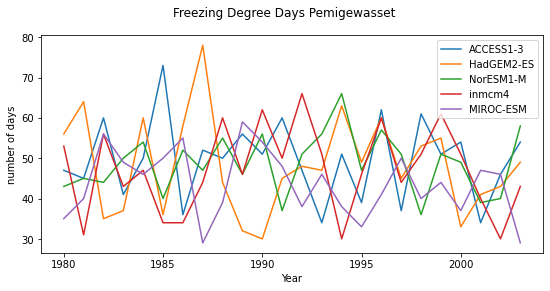

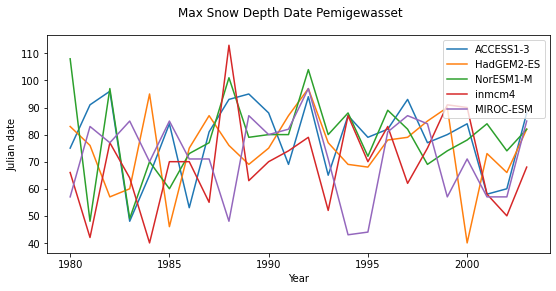

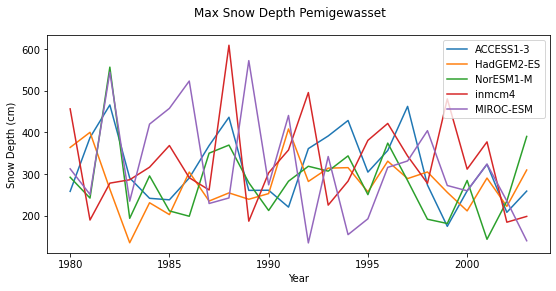

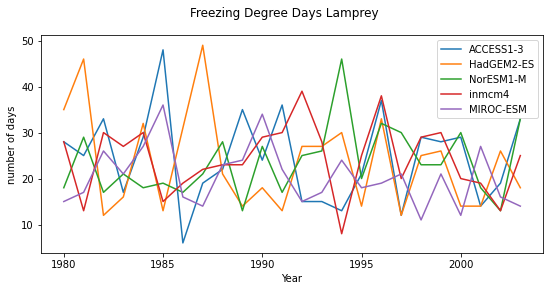

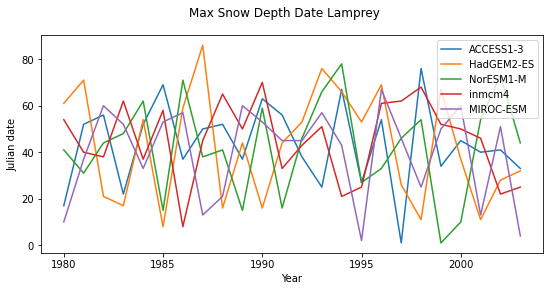

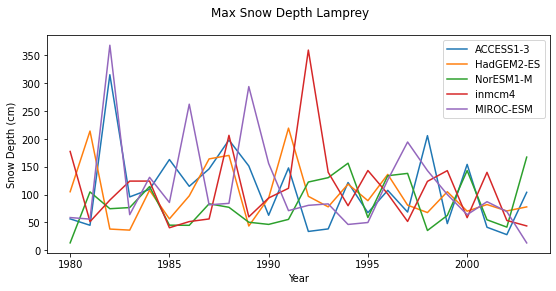

#### Transition dates 
 Next, transition dates were determined for each year. First, early season transition dates were identified. Air temperature was considered to have transitioned to spring when the high air temperature exceeded 0 C, and did not dip below 0 C for the rest of the season. Snow depth was considered to have transitioned on the day of snow disappearance, or when snow depth was less than .1 cm, and did not exceed .1 cm again until the following season. (Contosta, Grogan). Understanding dates of the last freezing days and snow disappearance helps determines the onset of the transition from winter to spring. 
 Then, hydrological transition dates were identified. The date of peak soil moisture represented the soil moisture transition, and the date of peak baseflow in the river represented river discharge transition. (contosta). In snow-controlled ecosystems, river discharge and soil moisture peaks represent springtime hydrological transitions.  (Contosta). These transition dates were represented in a time series plotting the day of year each annual transition occurred on the y-axis, over the period of analysis. 

#### First Transition Dates
The function firstransitions was used to find snow transition date and temperature transition date for each location. A for loop iterated the function for each year, for the winter and spring transition season (January 1 to May 31). Results were stored in the dftrans dataframes for each river.

In [ ]:
def firsttransitions(dfsp, dft,  startdate, enddate, model):
    fdd = (dft.loc[startdate : enddate, model]<=freeze) #fdd
    tt = int(fdd.where(fdd==True).dropna().index[-1].strftime('%j')) #T transition date  
    sd = (dfsp.loc[startdate : enddate, model]>=nosnow) #snow on the ground days (snow days)
    st = int(sd.where(sd==True).dropna().index[-1].strftime('%j')) #snow disapearance date (snow transition/st)
    return tt, st

In [ ]:
for i,r in dftransl.iterrows():
    start = "1, 1, {}".format(i)
    startdate = datetime.strptime(start, "%m, %d, %Y")
    end = "5, 31, {}".format(i)
    enddate = datetime.strptime(end, "%m, %d, %Y")
    tt, st = firsttransitions(dfspl, dftl, startdate, enddate, 'ACCESS1-3')
    ttaccll.append(tt)
    staccll.append(st)
dftransl['ttacc'] = ttaccll
dftransl['stacc'] = staccll 

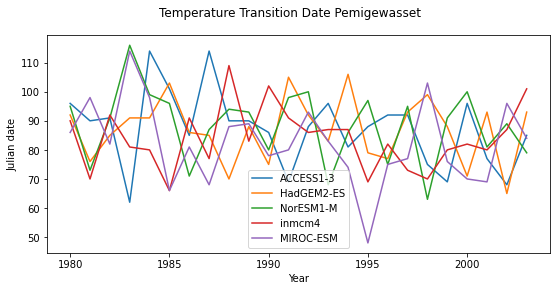

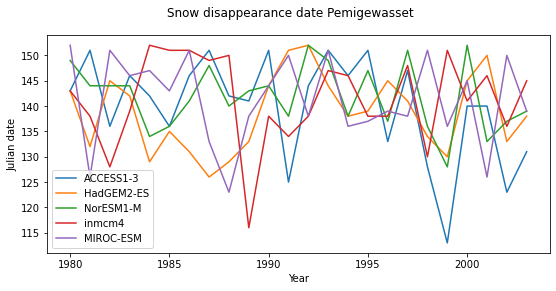

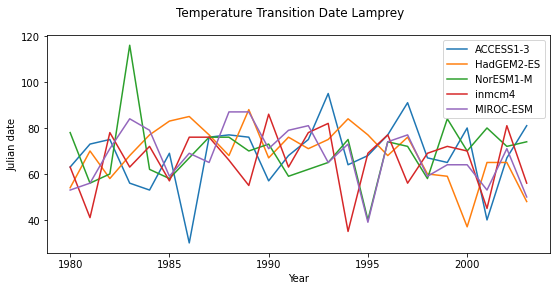

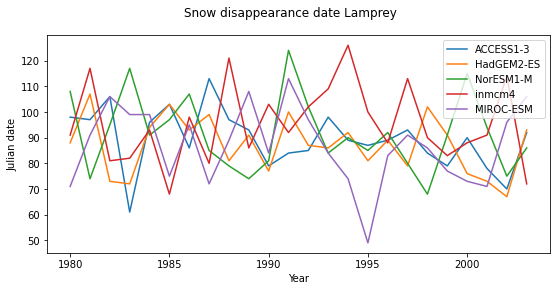

#### Hydrological transition dates 
The function hydtransitions was used to find soil moisture transition date and discharge transition date for each location. A for loop iterated the function for each year, for the winter and spring transition season (January 1 to May 31). Results were stored in the dftrans dataframes for each river.

In [ ]:
#%% Determining hydrological transition dates 
def hydtransitions(dfsoil, dfq, startdate, enddate, model):
    soilslice = ((dfsoil.loc[startdate : enddate, model]).sort_values())<=95.2
    #maxsm = (dfsoil.loc[startdate : enddate, model]).max() #max soil moisture
    smdate = soilslice.where(soilslice==True).dropna().idxmax()
    maxsm = dfsoil.loc[smdate, model]
    smd = int(soilslice.where(soilslice==True).dropna().idxmax().strftime('%j')) #juliandate of max soil moisture
    maxq = dfq.loc[startdate : enddate, model].max() #max discharge
    qd = int(dfq.loc[startdate : enddate, model].idxmax().strftime('%j')) #juliandate of max discharge
    return maxsm, smd, maxq, qd

In [ ]:
for i,r in dftransl.iterrows():
    start = "2, 1, {}".format(i)
    startdate = datetime.strptime(start, "%m, %d, %Y")
    end = "5, 31, {}".format(i)
    enddate = datetime.strptime(end, "%m, %d, %Y")
    maxsmacc, smdacc, maxqacc, qdacc = hydtransitions(dfsoill, dfql, startdate, enddate, 'ACCESS1-3')
    maxsmaccll.append(maxsmacc)
    smdaccll.append(smdacc)
    maxqaccll.append(maxqacc)
    qdaccll.append(qdacc)
dftransl['maxsmacc'] = maxsmaccll
dftransl['smdacc'] = smdaccll
dftransl['maxqacc'] = maxqaccll
dftransl['qdacc'] = qdaccll

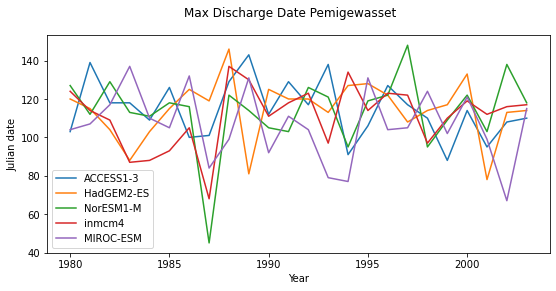

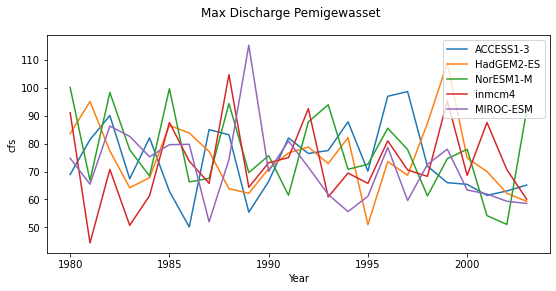

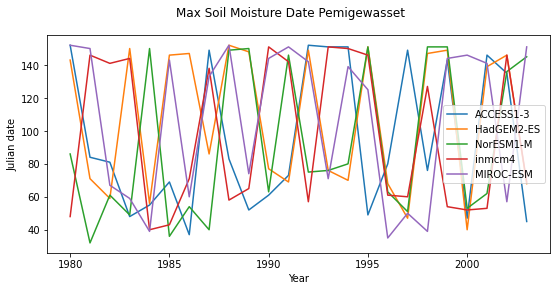

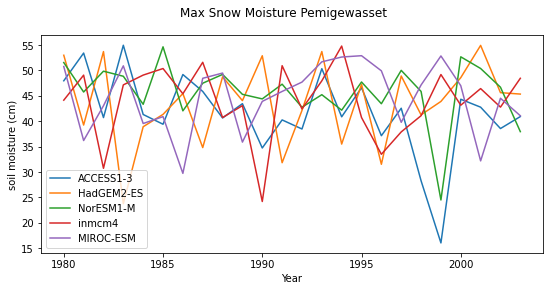

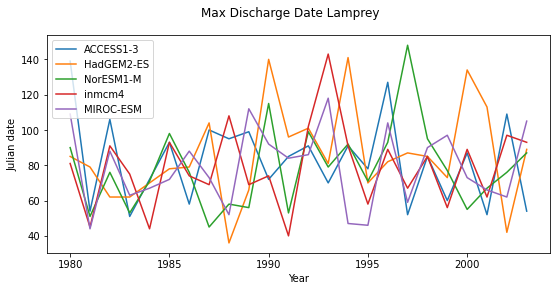

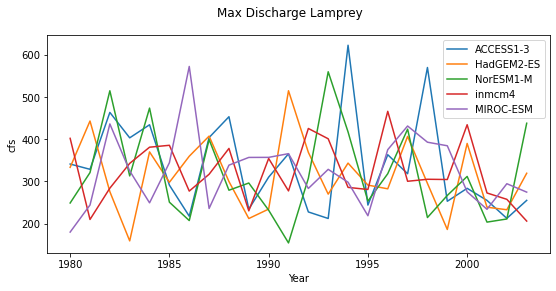

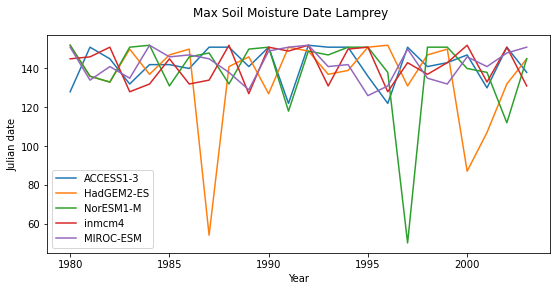

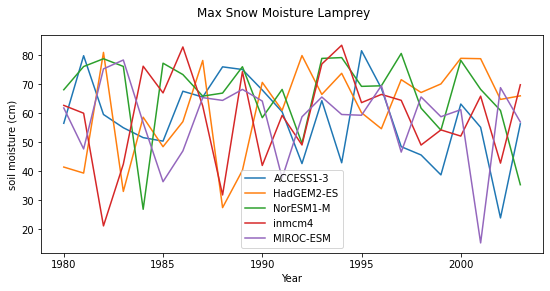

#### Lags
  Next, lags between transition dates were determined for each year. Lags were calculated as the number of days between pairs of transition dates in the same location. (Contosta). Pairs of transition dates for which lags were calculated are represented in Table. Lag lengths between transition dates for various variables help determine temporal relationships between these variables. Lag lengths were represented in a time series with lag lengths plotted against year for the length of the analysis period, to visualize how these temporal relationships may change over time. 
Table: pairs of transition dates for which lags were calculated.  
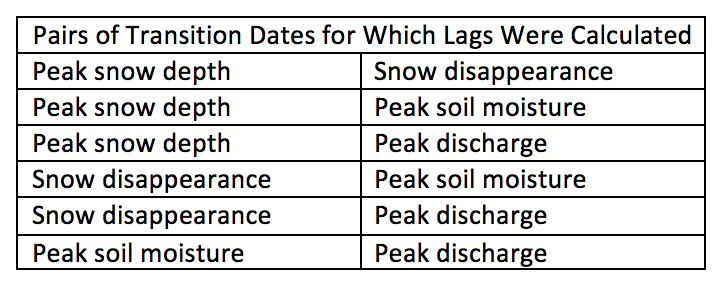


The function laglength was created to calculate lags. 

In [ ]:
def laglength(latervariable,earliervariable):
    lag = latervariable - earliervariable
    return(lag)

#### Correlational analysis 
  Finally, it was tested whether timing of transitions and duration of lags varied as a function of winter severity, as represented by snow depth and FDD.  (Contosta) Correlational analysis was performed on number of FDD and duration of lag (number of days) for each lag pair, peak snow depth and duration of lag for each lag pair, FDD and transition date for certain varables, and peak snow depth and transition date for certain variables.  
  The R2 value of the best fit line for each correlation was used to represent strength of relationship.  This analysis determined relationship between winter severity and springtime transitions. 

The functon plotwinterseverity was created to plot lags and transition dates against the winter severity indicators, FDD and maximum snow depth. 

In [ ]:
def plotvswinterseverity(lagacc, laghad, lagnor, laginm, lagmir, fddacc, fddhad, 
                       fddnor, fddinm, fddmir, maxsnowdepthacc, maxsnowdepthhad, 
                       maxsnowdepthnor, maxsnowdepthinm, maxsnowdepthmir, lagtitle, river):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True)
    fig.set_size_inches(9, 4)
    ax1.scatter(lagacc, fddacc,label='ACCESS1-3')
    ax1.scatter(laghad, fddhad,label='HadGEM2-ES')
    ax1.scatter(lagnor, fddnor,label='NorESM1-M')
    ax1.scatter(laginm, fddinm,label='inmcm4')
    ax1.scatter(lagmir, fddmir,label='MIROC-ESM')
    ax1.set_title('vs. FDD')
    ax1.set_ylabel('Freezing Degree Days')
    ax2.scatter(lagacc, maxsnowdepthacc,label='ACCESS1-3')
    ax2.scatter(laghad, maxsnowdepthhad,label='HadGEM2-ES')
    ax2.scatter(lagnor, maxsnowdepthnor,label='NorESM1-M')
    ax2.scatter(laginm, maxsnowdepthinm,label='inmcm4')
    ax2.scatter(lagmir, maxsnowdepthmir,label='MIROC-ESM')
    ax2.set_title('vs. Max Snow Depth')
    ax2.set_ylabel('Maximum Snow Depth(cm)')
    fig.suptitle(lagtitle+' vs. Winter Severity,'+river)
    ax1.set_xlabel(lagtitle)
    ax2.set_xlabel(lagtitle)
    ax1.legend(loc='best')
    return fig 

The results were plotted. 

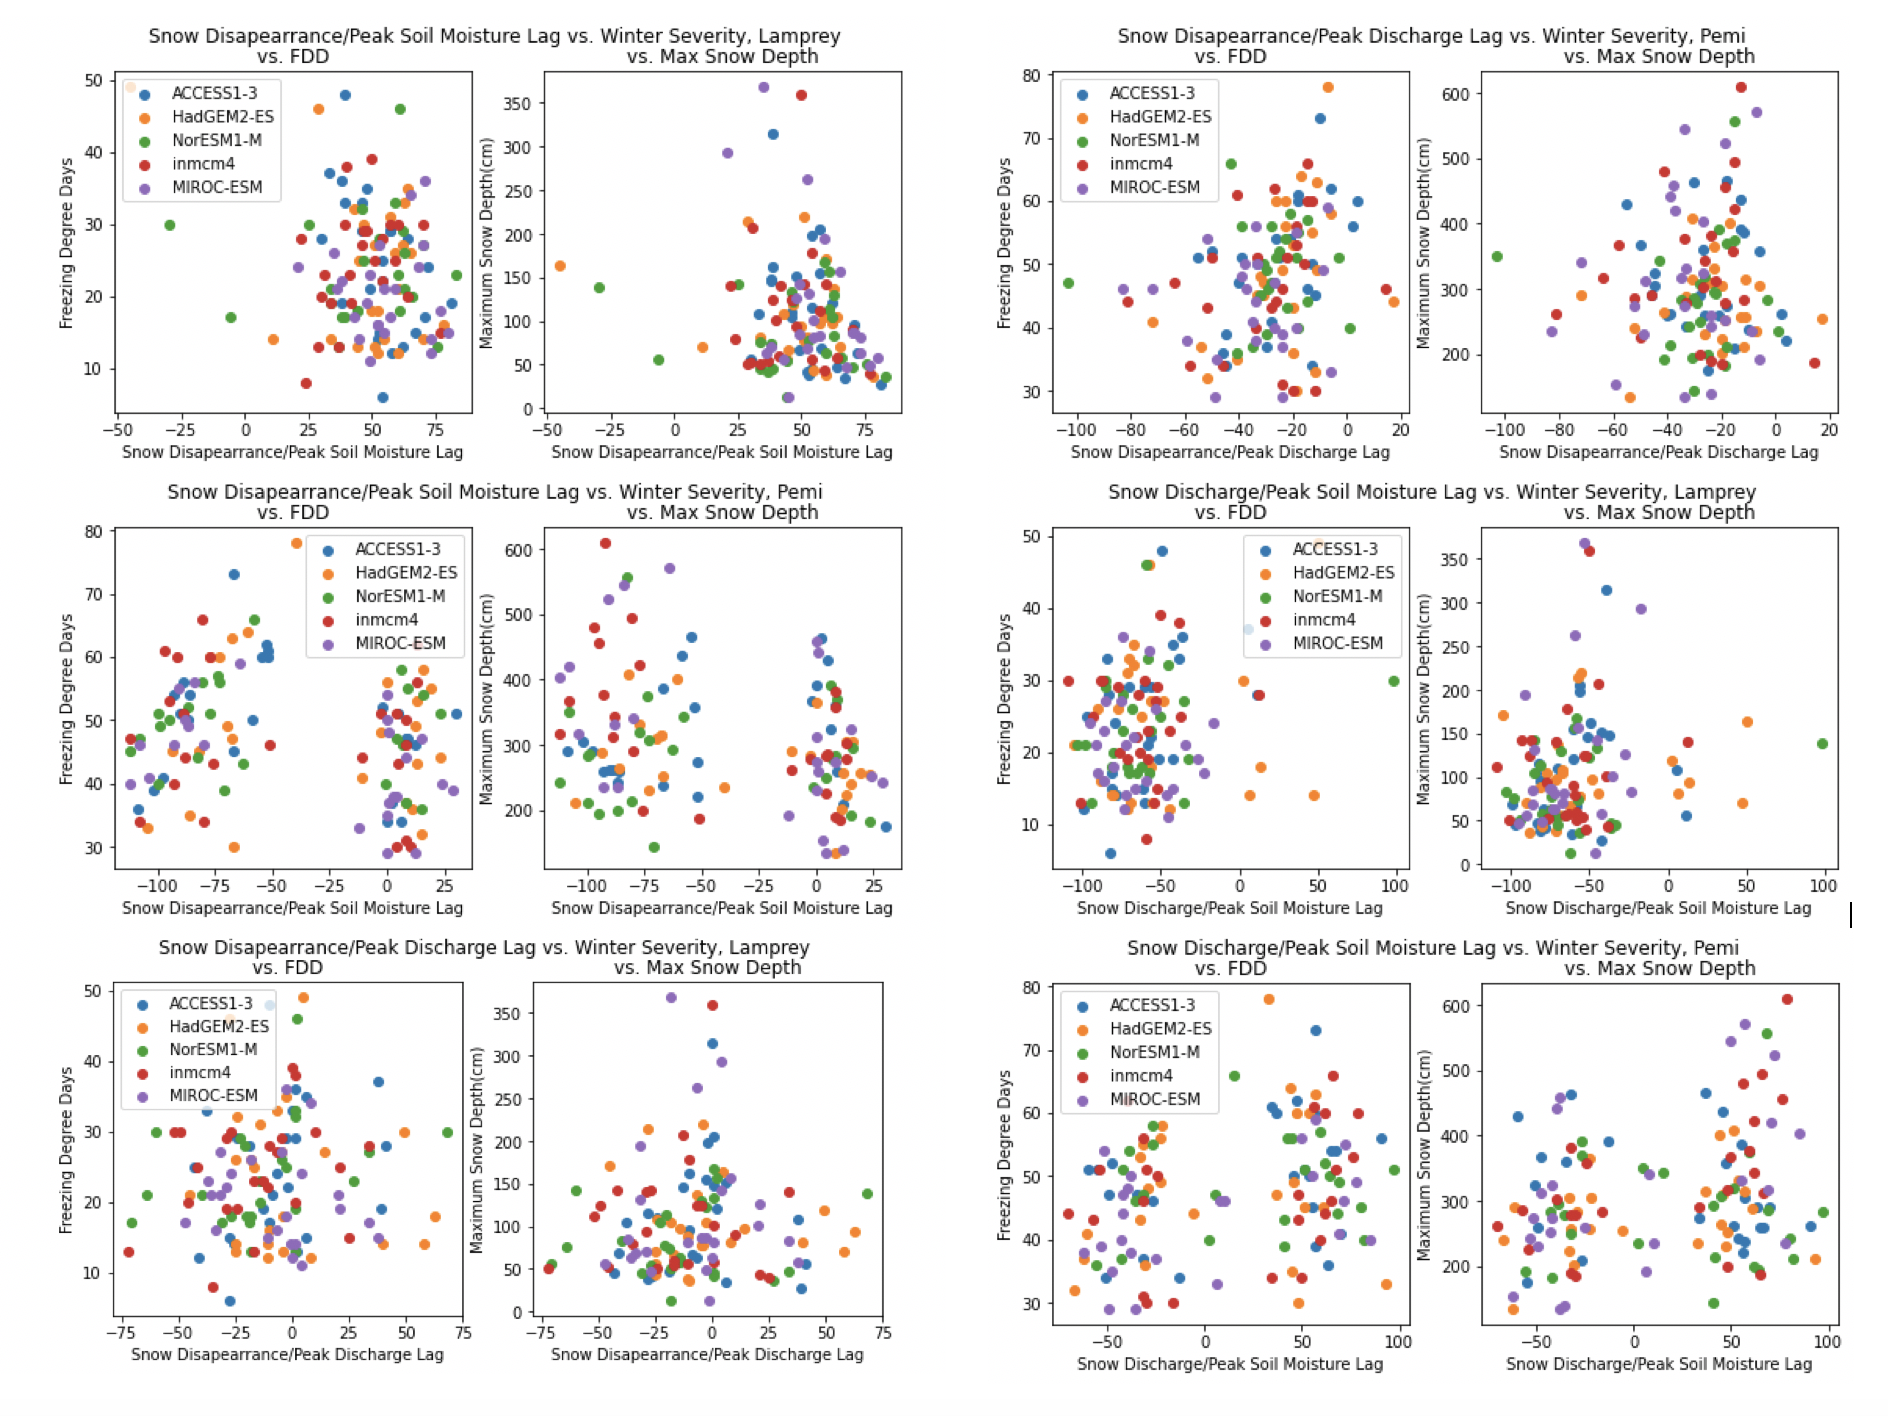

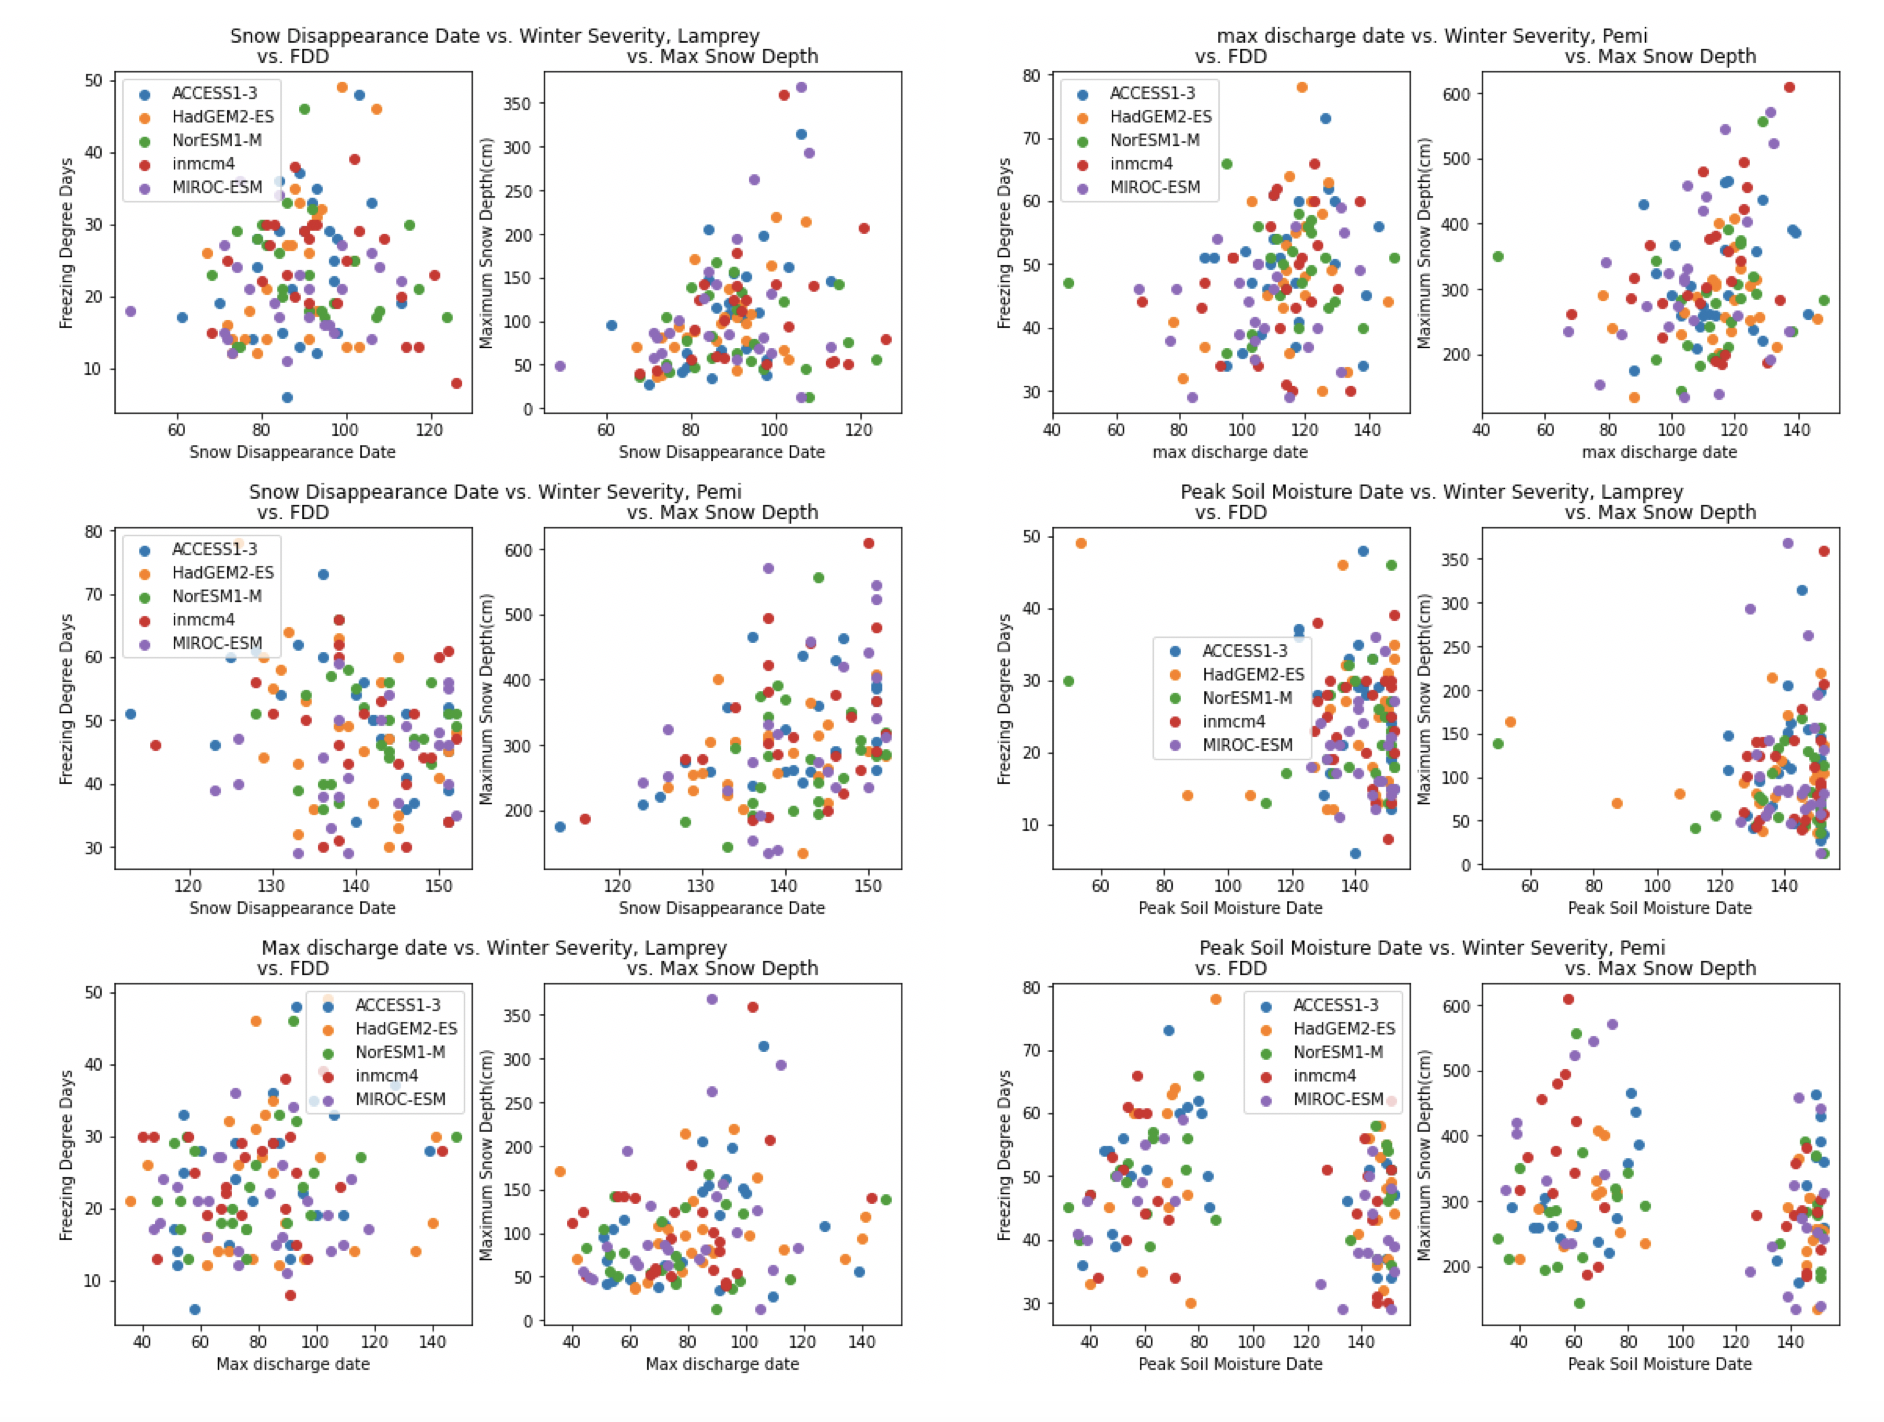

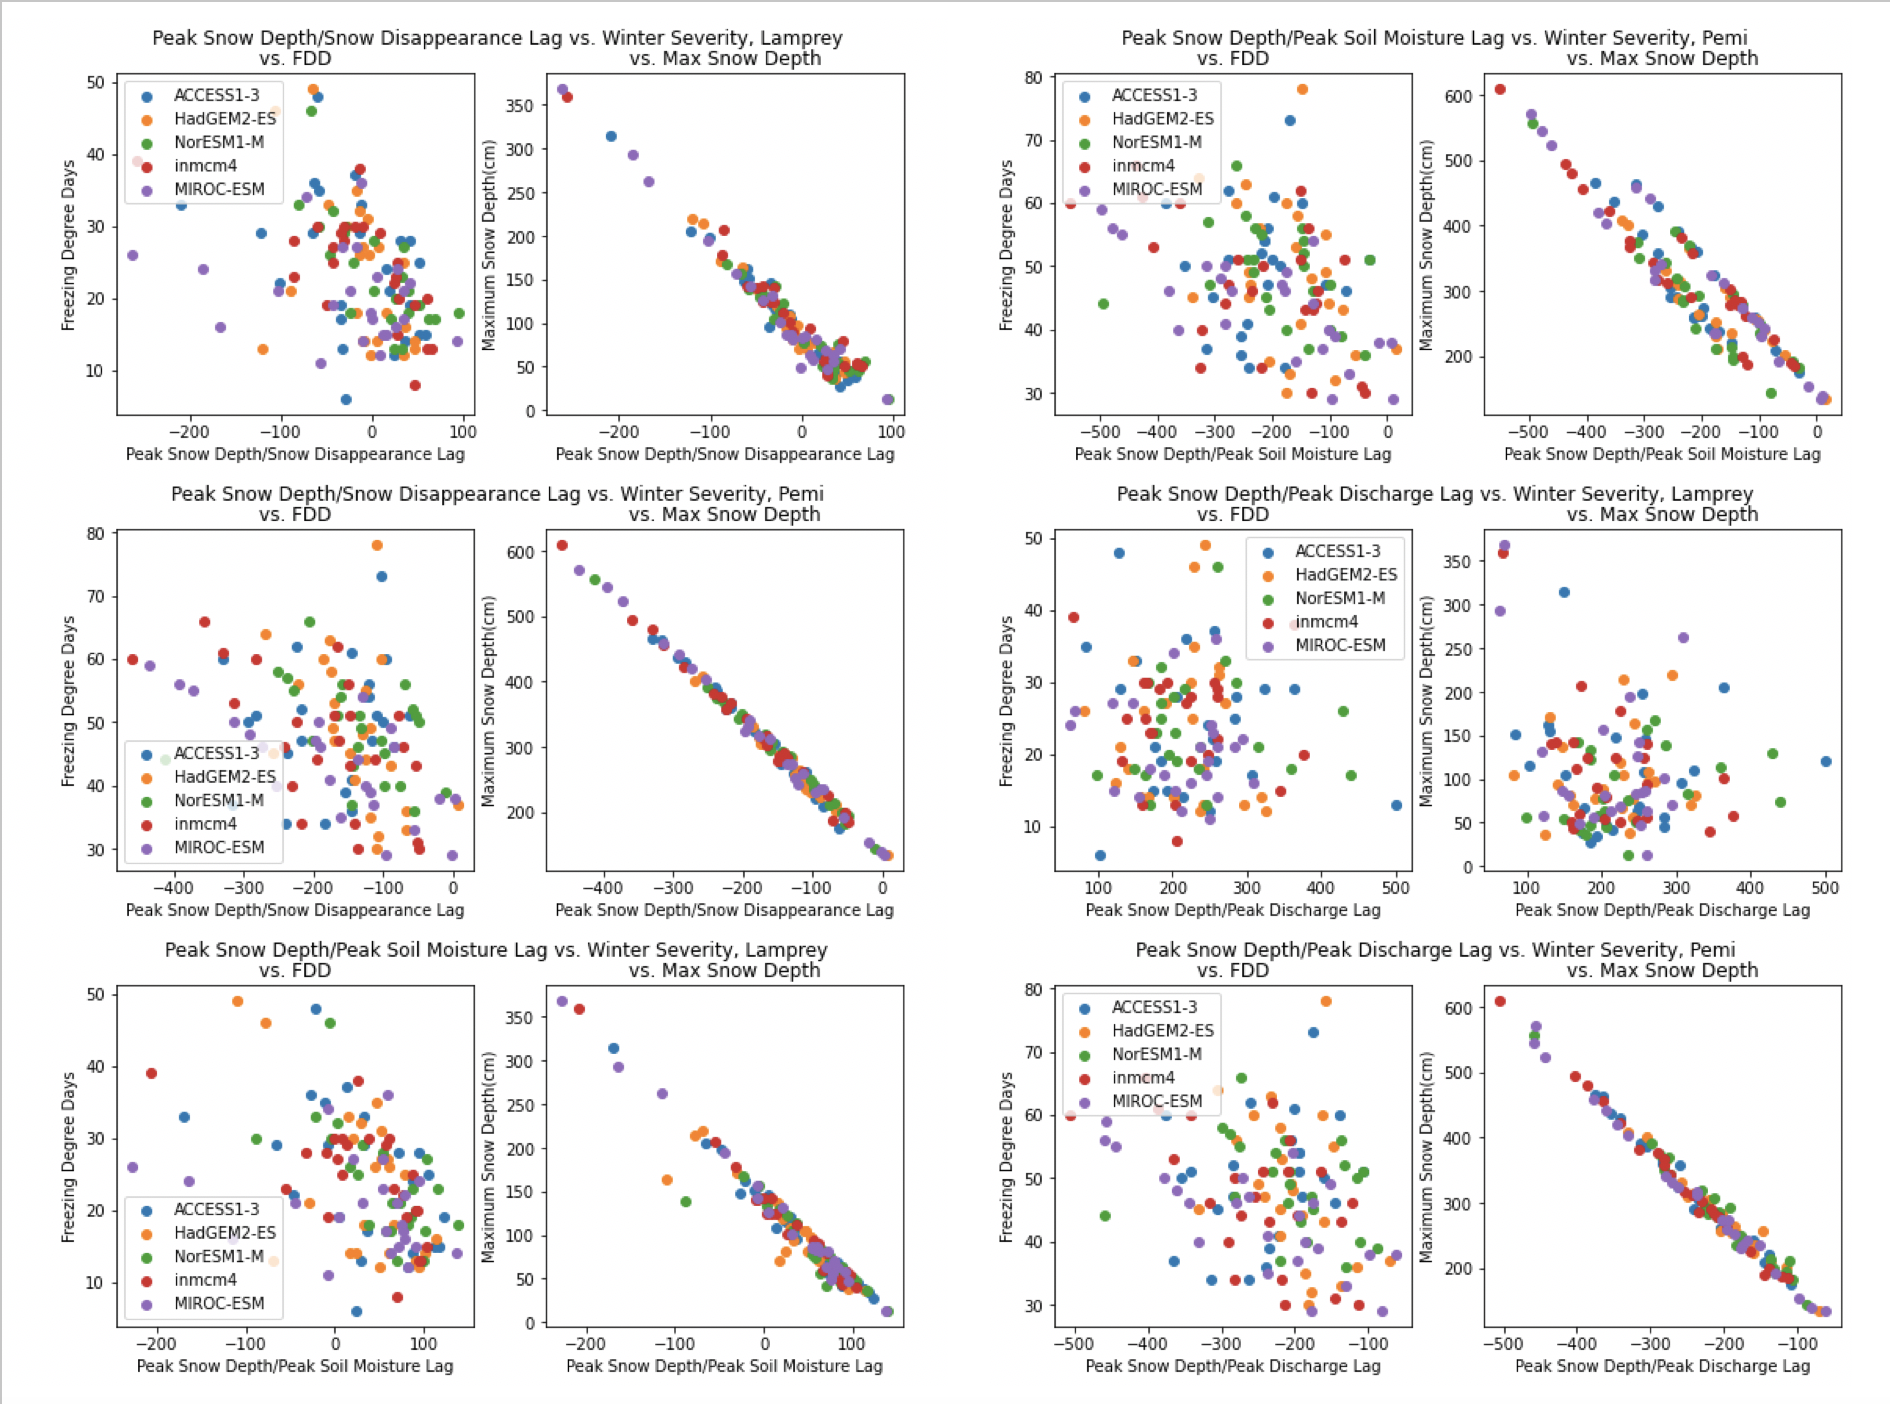

## Discussion and conclusion

#### (Outline:)

#### Individual variable changes
Changes in each variable over time

The variable increased/decreased/did not change over time at the Pemigewasset/Lamprey location/both locations. 
    The variable began increasing/decreasing noticably in the year __ at x location, and _ at y location.  
    The changes were more noticable at the Pemigewasset location/Lamprey location/the changes were similar at both locations.  
    The change is likely due to _ . 
    The change was like more visible at the Pemigewasset location/Lamprey location because ___ . 
    


#### Correlation analysis: winter severity, lag length, and transition dates 
There was/was not mathematical correlation between ___ and ___ at the Pemigewasset/Lamprey location/both locations. 
The correlation was stronger at the Pemigewasset location/Lamprey location/the changes were similar at both locations.
The correlation could be due to _ . 

####

#### Future research

## References